# Digit Recognizer using TensorFlow

Here, I identify digits in the MNIST data using TensorFlow to build a neural network classifier. Based on tutorials provided on the TensorFlow website.

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
%matplotlib inline

In [140]:
training_digits = np.loadtxt('train.csv', delimiter = ',', skiprows = 1)


In [141]:
labels = training_digits[:,0]
digit_data = (training_digits[:,1:]-128)/128

Now, let's divide our data into a training set, a validation set, and a test set.

In [142]:
train_length = int(len(labels)/2) 
valid_length = int(len(labels)/4)
test_length = int(len(labels)-train_length-valid_length)
train_data = digit_data[:train_length,:]
train_labels = labels[:train_length]
valid_data = digit_data[train_length:(train_length+valid_length),:]
valid_labels = labels[train_length:(train_length+valid_length)]
test_data = digit_data[(train_length+valid_length):,:]
test_labels = labels[(train_length+valid_length):]


Now that the data is loaded, we can check to see whether all digits are sufficiently represented in each of the datasets by plotting histograms:

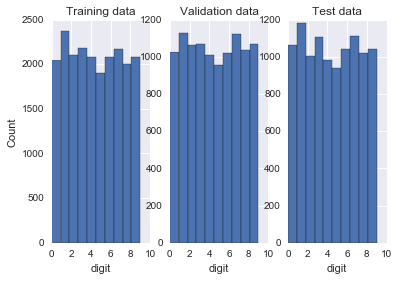

In [143]:
plt.subplot(131)
plt.hist(train_labels)
plt.title('Training data')
plt.xlabel('digit')
plt.ylabel('Count')
plt.subplot(132)
plt.hist(valid_labels)
plt.title('Validation data')
plt.xlabel('digit')
plt.subplot(133)
plt.hist(test_labels)
plt.title('Test data')
plt.xlabel('digit')
plt.show()


Great, it looks like we have a fairly even distribution of digits in each set.

We need to reformat the digit labels into 1-hot encodings:

In [144]:
num_labels = 10
def reformat(labels):
    labels = (np.arange(num_labels)==labels[:,None]).astype(np.float32)
    return labels

train_labels1h = reformat(train_labels)
valid_labels1h = reformat(valid_labels)
test_labels1h = reformat(test_labels)

We'll start by building a model with a single hidden layer with 1024 nodes. We'll use a stochastic gradient descent algorithm, where gradient descent optimization is applied for a batch of the training data, and this process is repeated many times, with the idea being that we gradually approach the true minima for the training dataset.

In [145]:
batch_size = 150
datasize = 28*28
hidden1_units = 1024


graph = tf.Graph()

with graph.as_default():
    #Input data, with placeholders for running batches of training data
    tf_train_data = tf.placeholder(tf.float32, shape = (batch_size, datasize))
    tf_train_labels = tf.placeholder(tf.float32, shape = (batch_size, num_labels))
    tf_valid_data = tf.constant(np.float32(valid_data))
    tf_test_data = tf.constant(np.float32(test_data))    
    
    # weights and biases for hidden layer
    h1weights = tf.Variable(tf.truncated_normal([datasize, hidden1_units]))
    h1biases = tf.Variable(tf.zeros([hidden1_units]))

    hidden1 = tf.nn.relu(tf.matmul(tf_train_data,h1weights)+h1biases)
    
    # weights and biases for linear outer layer
    weights = tf.Variable(tf.truncated_normal([hidden1_units, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
        
    logits = tf.matmul(hidden1, weights)+biases

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    train_predict = tf.nn.softmax(logits)
    h1valid = tf.nn.relu(tf.matmul(tf_valid_data, h1weights)+h1biases)
    valid_predict = tf.nn.softmax(tf.matmul(h1valid, weights)+biases)
   


In [146]:
def accuracy(predictions, labels):
    return(100.0 * np.sum(np.argmax(predictions, 1 )== np.argmax(labels, 1))
           /predictions.shape[0])

In [148]:
num_steps = 5001
learning_rate = 0.1

with tf.Session(graph = graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(num_steps):
        start_time = time.time()
        
        offset = (step * batch_size)%(train_labels1h.shape[0]-batch_size)
        batch_data = train_data[offset:(offset+batch_size),:]
        batch_labels = train_labels1h[offset:(offset+batch_size),:]
        feed_dict = {
            tf_train_data : batch_data, 
            tf_train_labels : batch_labels}
        _, l, predictions = session.run( [optimizer, loss, train_predict], feed_dict)
        
        if (step % 100 == 0) and (step > 100): learning_rate = learning_rate / 1.1
            
        if (step % 500 == 0):
            print("Batch loss at step %d: %f" % (step, l))
            print("Batch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % accuracy(valid_predict.eval(), valid_labels1h))
        
        
    

Initialized
Batch loss at step 0: 523.622803
Batch accuracy: 8.0%
Validation accuracy: 8.4%
Batch loss at step 500: 24.087427
Batch accuracy: 82.0%
Validation accuracy: 81.3%
Batch loss at step 1000: 12.688529
Batch accuracy: 86.7%
Validation accuracy: 84.7%
Batch loss at step 1500: 9.298770
Batch accuracy: 90.0%
Validation accuracy: 86.4%
Batch loss at step 2000: 16.313620
Batch accuracy: 87.3%
Validation accuracy: 87.3%
Batch loss at step 2500: 8.175518
Batch accuracy: 92.7%
Validation accuracy: 87.9%
Batch loss at step 3000: 7.089914
Batch accuracy: 90.7%
Validation accuracy: 88.2%
Batch loss at step 3500: 5.984041
Batch accuracy: 88.7%
Validation accuracy: 88.5%
Batch loss at step 4000: 7.540378
Batch accuracy: 94.7%
Validation accuracy: 88.9%
Batch loss at step 4500: 5.392471
Batch accuracy: 88.7%
Validation accuracy: 89.1%
Batch loss at step 5000: 7.301492
Batch accuracy: 92.7%
Validation accuracy: 89.1%
